In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re

#### Loading the Dataset.

In [2]:
DF = pd.read_csv('Automobile_insurance_fraud.csv')

In [3]:
DF.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
DF.shape

(1000, 40)

In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

#### Lets check for null values

In [6]:
DF.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

_c39 has no usable data present. Other columns appear to have no null values.

#### Checking for blank spaces, random characters in each column

In [8]:
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
for c in DF:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((DF[c] == s).sum())

  in months_as_customer =  0
? in months_as_customer =  0
- in months_as_customer =  0
 ? in months_as_customer =  0
 - in months_as_customer =  0
?  in months_as_customer =  0
-  in months_as_customer =  0
 ?  in months_as_customer =  0
 -  in months_as_customer =  0
NA in months_as_customer =  0
N/A in months_as_customer =  0
 NA in months_as_customer =  0
 N/A in months_as_customer =  0
  in age =  0
? in age =  0
- in age =  0
 ? in age =  0
 - in age =  0
?  in age =  0
-  in age =  0
 ?  in age =  0
 -  in age =  0
NA in age =  0
N/A in age =  0
 NA in age =  0
 N/A in age =  0
  in policy_number =  0
? in policy_number =  0
- in policy_number =  0
 ? in policy_number =  0
 - in policy_number =  0
?  in policy_number =  0
-  in policy_number =  0
 ?  in policy_number =  0
 -  in policy_number =  0
NA in policy_number =  0
N/A in policy_number =  0
 NA in policy_number =  0
 N/A in policy_number =  0
  in policy_bind_date =  0
? in policy_bind_date =  0
- in policy_bind_date =  0


 - in auto_make =  0
?  in auto_make =  0
-  in auto_make =  0
 ?  in auto_make =  0
 -  in auto_make =  0
NA in auto_make =  0
N/A in auto_make =  0
 NA in auto_make =  0
 N/A in auto_make =  0
  in auto_model =  0
? in auto_model =  0
- in auto_model =  0
 ? in auto_model =  0
 - in auto_model =  0
?  in auto_model =  0
-  in auto_model =  0
 ?  in auto_model =  0
 -  in auto_model =  0
NA in auto_model =  0
N/A in auto_model =  0
 NA in auto_model =  0
 N/A in auto_model =  0
  in auto_year =  0
? in auto_year =  0
- in auto_year =  0
 ? in auto_year =  0
 - in auto_year =  0
?  in auto_year =  0
-  in auto_year =  0
 ?  in auto_year =  0
 -  in auto_year =  0
NA in auto_year =  0
N/A in auto_year =  0
 NA in auto_year =  0
 N/A in auto_year =  0
  in fraud_reported =  0
? in fraud_reported =  0
- in fraud_reported =  0
 ? in fraud_reported =  0
 - in fraud_reported =  0
?  in fraud_reported =  0
-  in fraud_reported =  0
 ?  in fraud_reported =  0
 -  in fraud_reported =  0
NA in f

Column:
    
'police_report_available' contains  343 '?' character

'property_damage'contains  360 '?' character

'collision_type' contains  178 '?' character  

In [9]:
(DF=='?').sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [10]:
DF.replace({'?': np.nan}, inplace=True) #converting ' ?' to NaN values

In [11]:
DF.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

There are null values in columns: collision_type,property_damage,police_report_available and _c39

In [12]:
DF

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,NaN,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


_c39 has no  data present. So it will be dropped.

In [13]:
DF.drop(columns=['_c39'],inplace=True)

collision_type,property_damage,police_report_available

#### Checking for unique categories in the categorical columns with null values

In [14]:
DF.collision_type.unique() 

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

There are 3 unique categories in collision_type

<AxesSubplot:xlabel='collision_type', ylabel='count'>

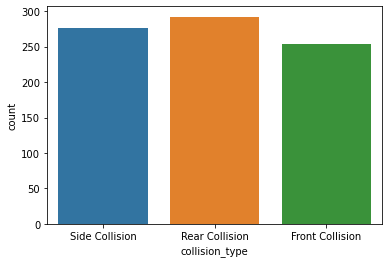

In [15]:
sns.countplot(DF.collision_type)

In [16]:
DF.collision_type.mode() #most frequently occuring value.

0    Rear Collision
dtype: object

In [17]:
DF.collision_type.isnull().sum()/1000*100 

17.8

17.8% of data in collision_type is null.

In [18]:
(DF['collision_type'] == 'Rear Collision').sum()/DF.collision_type.count()*100 #checking the % share of most frequently occuring value.

35.523114355231144

35.52% of data in collision_type is 'Rear Collision'

#### Therefore imputing 'Rear Collision' to NaN values in collision_type column

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )

In [21]:
si = si.fit(DF[['collision_type']])

In [22]:
DF[['collision_type']] = si.transform(DF[['collision_type']])

In [23]:
DF[['collision_type']].isnull().sum()

collision_type    0
dtype: int64

In [24]:
DF.property_damage.unique() 

array(['YES', nan, 'NO'], dtype=object)

There are 2 unique categories in property_damage

<AxesSubplot:xlabel='property_damage', ylabel='count'>

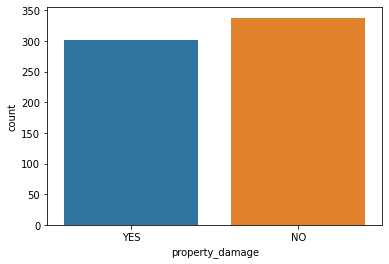

In [25]:
sns.countplot(DF.property_damage)

In [26]:
DF.property_damage.mode() #most frequently occuring value.

0    NO
dtype: object

In [27]:
DF.property_damage.isnull().sum()/1000*100 

36.0

36.0% of data in collision_type is null.

In [28]:
(DF['property_damage'] == 'NO').sum()/DF.property_damage.count()*100 #checking the % share of most frequently occuring value.

52.81249999999999

52.81% of data in collision_type is 'No'

#### Therefore imputing 'No' to NaN values in property_damage column

In [29]:
from sklearn.impute import SimpleImputer

In [30]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )

In [31]:
si = si.fit(DF[['property_damage']])

In [32]:
DF[['property_damage']] = si.transform(DF[['property_damage']])

In [33]:
DF[['property_damage']].isnull().sum()

property_damage    0
dtype: int64

In [34]:
DF.police_report_available.unique() 

array(['YES', nan, 'NO'], dtype=object)

There are 2 unique categories in police_report_available

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

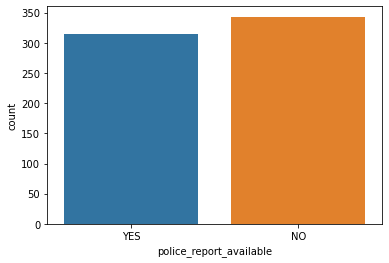

In [35]:
sns.countplot(DF.police_report_available)

In [36]:
DF.police_report_available.mode() #most frequently occuring value.

0    NO
dtype: object

In [37]:
DF.police_report_available.isnull().sum()/1000*100 

34.300000000000004

34.30% of data in collision_type is null.

In [38]:
(DF['police_report_available'] == 'NO').sum()/DF.police_report_available.count()*100 #checking the % share of most frequently occuring value.

52.207001522070016

52.20% of data in collision_type is 'No'

#### Therefore imputing 'No' to NaN values in police_report_available column

In [39]:
from sklearn.impute import SimpleImputer

In [40]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )

In [41]:
si = si.fit(DF[['police_report_available']])

In [42]:
DF[['police_report_available']] = si.transform(DF[['police_report_available']])

In [43]:
DF[['police_report_available']].isnull().sum()

police_report_available    0
dtype: int64

In [44]:
DF.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

No more null values in the dataset.

### Dataset Description

##### Problem Statement:
##### Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

##### In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [45]:
DF.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


#### Feature column data type indicates that feature data are a mix of continuous and categorical data ,while target column ('fraud_reported') data type indicates that dependent variable data is categorical in nature.

#### Getting the basic summary and statistical information of the data.

In [46]:
DF.nunique() #analysing unique values in each column

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [47]:
DF.dtypes[DF.dtypes == 'object'] #Identifying the Categorical Columns

policy_bind_date           object
policy_state               object
policy_csl                 object
insured_sex                object
insured_education_level    object
insured_occupation         object
insured_hobbies            object
insured_relationship       object
incident_date              object
incident_type              object
collision_type             object
incident_severity          object
authorities_contacted      object
incident_state             object
incident_city              object
incident_location          object
property_damage            object
police_report_available    object
auto_make                  object
auto_model                 object
fraud_reported             object
dtype: object

In [48]:
DF.dtypes[DF.dtypes != 'object'] #Identifying the Continuous/Discrete Columns

months_as_customer               int64
age                              int64
policy_number                    int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
capital-gains                    int64
capital-loss                     int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
auto_year                        int64
dtype: object

In [49]:
DF.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


Difference in mean and 50% and considerable difference in 75% and max of columns months_as_customer,policy_annual_premium,capital-gains,total_claim_amount,injury_claim and property_claim suggests skewness in respective data distributions and presence of outliers.

### This is a Classification Problem since the Target variable ("fraud_reported") has Categorical type of Data.

#### Analyzing the Target Class

In [50]:
DF['fraud_reported'].unique() 

array(['Y', 'N'], dtype=object)

#### There are 2 unique catergorical values in the Label column / target variable.

In [51]:
DF['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

Class   
'N'   : Has 753 values

'Y'   : Has 247 values



<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

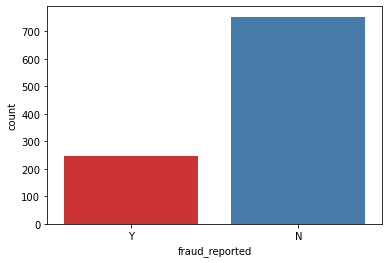

In [52]:
sns.countplot(DF['fraud_reported'], palette="Set1")

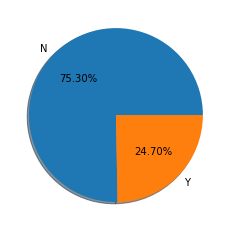

In [53]:
labels = 'N','Y'
fig, ax = plt.subplots()
ax.pie(DF['fraud_reported'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

Class   
'N'   : Has 75.30% of total values

'Y'  : Has 24.70% of total values




#### Classes are imbalanced.

#### Analyzing Feature columns Catergorical Classes

In [54]:
DF.dtypes[DF.dtypes == 'object'] #Identifying the Categorical Columns

policy_bind_date           object
policy_state               object
policy_csl                 object
insured_sex                object
insured_education_level    object
insured_occupation         object
insured_hobbies            object
insured_relationship       object
incident_date              object
incident_type              object
collision_type             object
incident_severity          object
authorities_contacted      object
incident_state             object
incident_city              object
incident_location          object
property_damage            object
police_report_available    object
auto_make                  object
auto_model                 object
fraud_reported             object
dtype: object

In [55]:
DF['policy_bind_date'].unique()

array(['17-10-2014', '27-06-2006', '06-09-2000', '25-05-1990',
       '06-06-2014', '12-10-2006', '04-06-2000', '03-02-1990',
       '05-02-1997', '25-07-2011', '26-05-2002', '29-05-1999',
       '20-11-1997', '26-10-2012', '28-12-1998', '19-10-1992',
       '08-06-2005', '15-11-2004', '28-12-2014', '02-08-1992',
       '25-06-2002', '27-11-2005', '27-05-1994', '08-02-1991',
       '02-02-1996', '05-12-2013', '20-09-1990', '18-07-2002',
       '08-02-1990', '04-03-2014', '18-02-2000', '19-06-2008',
       '01-08-2003', '04-04-1992', '13-01-1991', '08-08-2010',
       '09-03-2003', '03-02-1993', '25-11-2002', '27-07-1997',
       '08-05-1995', '30-08-2012', '30-04-2006', '13-04-2003',
       '05-12-2007', '21-08-2006', '08-01-1990', '18-03-1990',
       '07-01-2008', '10-03-1997', '10-01-2004', '20-08-1994',
       '02-06-2002', '28-04-1994', '17-08-2014', '11-08-2007',
       '20-11-2008', '18-10-1995', '19-05-1993', '26-02-2005',
       '14-02-1990', '30-09-1993', '10-06-2014', '28-10

#### Extracting 'year' from policy_bind_date

In [56]:
DF['policy_bind_date']=pd.to_datetime(DF['policy_bind_date']) #creating datetime type dataframe

In [57]:
DF['Bind_Year']=DF['policy_bind_date'].apply(lambda y:y.year) #mapping year values to 'Year' column in main dataframe

In [58]:
DF.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Bind_Year
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,2014
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,NO,5070,780,780,3510,Mercedes,E400,2007,Y,2006
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,2000
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1990
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,2014


Dropping the column 'policy_bind_date' since it is no longer needed.

In [59]:
DF.drop(columns = ['policy_bind_date'],inplace = True)

In [60]:
DF.Bind_Year.max() # finding the most recent bind year

2015

#### Extracting 'Age' of policy bind from bind_year

In [62]:
DF['Bind_Age'] = DF['Bind_Year'].apply(lambda y: 2016 - y)

In [63]:
DF

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Bind_Year,Bind_Age
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,71610,6510,13020,52080,Saab,92x,2004,Y,2014,2
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,5070,780,780,3510,Mercedes,E400,2007,Y,2006,10
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,34650,7700,3850,23100,Dodge,RAM,2007,N,2000,16
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1990,26
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,6500,1300,650,4550,Accura,RSX,2009,N,2014,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,87200,17440,8720,61040,Honda,Accord,2006,N,1991,25
996,285,41,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,...,108480,18080,18080,72320,Volkswagen,Passat,2015,N,2014,2
997,130,34,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,67500,7500,7500,52500,Suburu,Impreza,1996,N,2003,13
998,458,62,533940,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,46980,5220,5220,36540,Audi,A5,1998,N,2011,5


Dropping the column 'policy_bind_date' since it is no longer needed.

In [64]:
DF.drop(columns = ['Bind_Year'],inplace = True)

In [65]:
DF['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

<AxesSubplot:xlabel='policy_state', ylabel='count'>

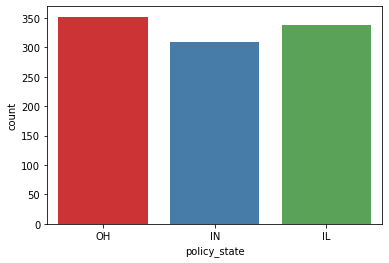

In [66]:
sns.countplot(DF['policy_state'], palette="Set1")

There are 3 unique categories and majority of the reports are from 'OH' state.

In [67]:
DF['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

There are 3 unique categories in policy_csl

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

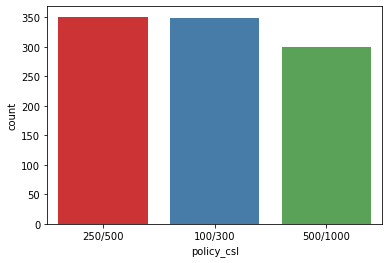

In [68]:
sns.countplot(DF['policy_csl'], palette="Set1")

Majority of combined single limits are 250/100 and 100/300.

In [69]:
DF['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

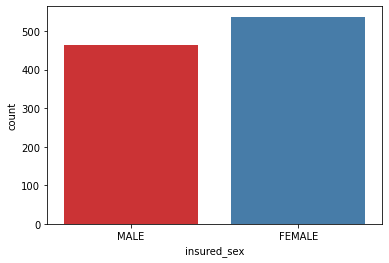

In [70]:
sns.countplot(DF['insured_sex'], palette="Set1")

Male and Female reports are almost balanced.

In [71]:
DF['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

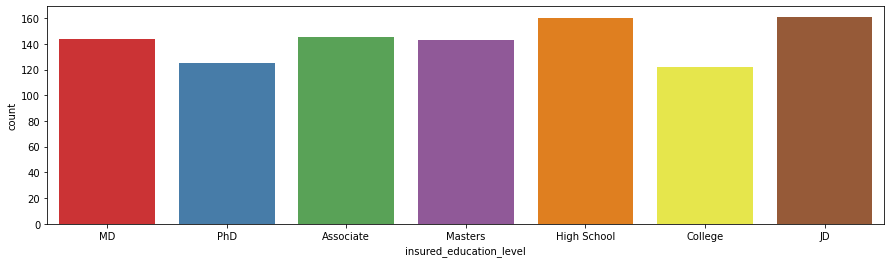

In [72]:
plt.figure(figsize=(15,4),facecolor='white')
sns.countplot(DF['insured_education_level'], palette="Set1")

High School, JD and MD are the most common insured_education_level

Husband is the most common relationship.

In [73]:
DF['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

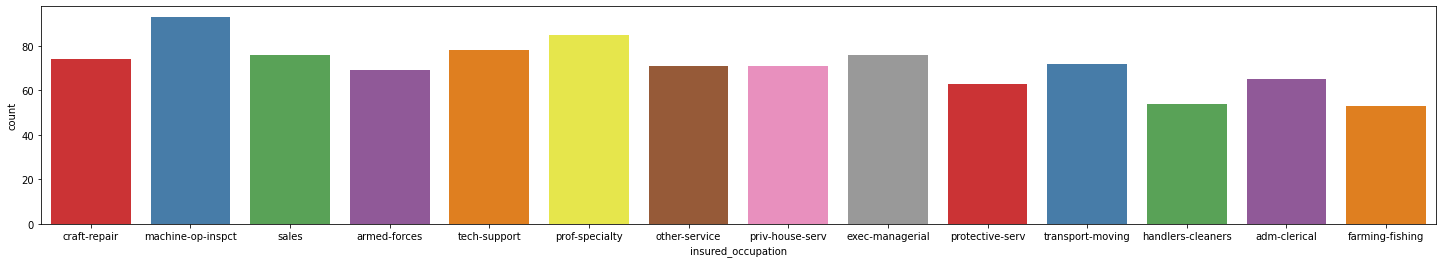

In [74]:
plt.figure(figsize=(25,4),facecolor='white')
sns.countplot(DF['insured_occupation'], palette="Set1")

machine-op-inspct and prof-specialty are the most common occupations.

In [75]:
DF['insured_hobbies'].value_counts()

reading           64
paintball         57
exercise          57
bungie-jumping    56
golf              55
camping           55
movies            55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

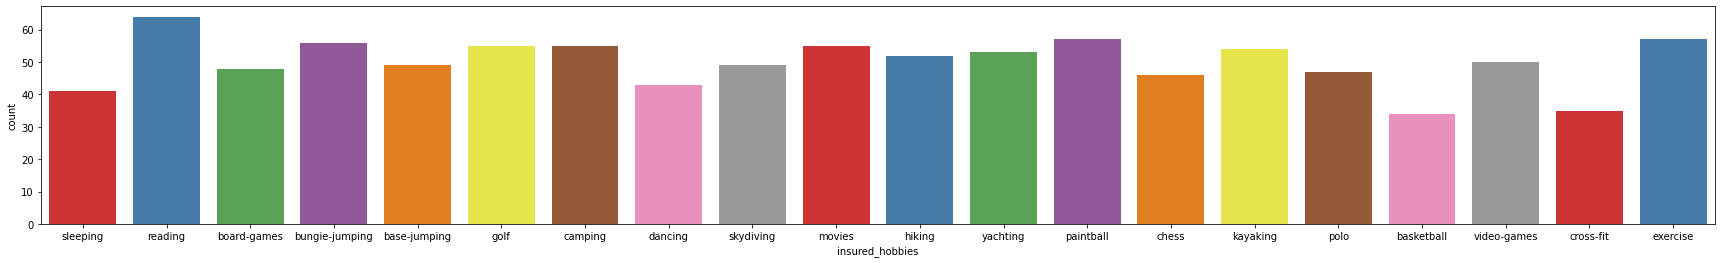

In [76]:
plt.figure(figsize=(30,4),facecolor='white')
sns.countplot(DF['insured_hobbies'], palette="Set1")

reading,exercise and paintball are most common hobbies.

In [77]:
DF['incident_date'].value_counts()

02-02-2015    28
17-02-2015    26
07-01-2015    25
24-01-2015    24
04-02-2015    24
10-01-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
31-01-2015    20
12-02-2015    20
06-02-2015    20
22-02-2015    20
12-01-2015    19
14-01-2015    19
21-02-2015    19
23-02-2015    19
21-01-2015    19
01-01-2015    19
01-02-2015    18
14-02-2015    18
28-02-2015    18
25-02-2015    18
20-01-2015    18
18-01-2015    18
03-01-2015    18
09-01-2015    17
06-01-2015    17
26-02-2015    17
24-02-2015    17
08-02-2015    17
13-02-2015    16
15-02-2015    16
16-01-2015    16
05-02-2015    16
16-02-2015    16
18-02-2015    15
17-01-2015    15
15-01-2015    15
28-01-2015    15
22-01-2015    14
20-02-2015    14
27-02-2015    14
03-02-2015    13
27-01-2015    13
23-01-2015    13
09-02-2015    13
01-03-2015    12
04-01-2015    12
26-01-2015    11
29-01-2015    11
02-01-2015    11
25-01-2015    10
19-02-2015    10
07-02-2015    10
11-02-2015    10
10-02-2015    10
11-01-2015    

Extracting Incident Month from incident_date

In [78]:
DF['incident_date']=pd.to_datetime(DF['incident_date']) #creating datetime type dataframe

In [79]:
DF['incident_month']=DF['incident_date'].apply(lambda m:m.month) #mapping month values to 'incident_month' column in main dataframe

In [80]:
DF.drop(columns=['incident_date'],inplace=True) # dropping auto_year since it is no longer needed

In [81]:
DF.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Bind_Age,incident_month
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,71610,6510,13020,52080,Saab,92x,2004,Y,2,1
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,5070,780,780,3510,Mercedes,E400,2007,Y,10,1
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,34650,7700,3850,23100,Dodge,RAM,2007,N,16,2
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,26,10
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,6500,1300,650,4550,Accura,RSX,2009,N,2,2


In [82]:
DF['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

There are 4 unique categories.

<AxesSubplot:xlabel='incident_type', ylabel='count'>

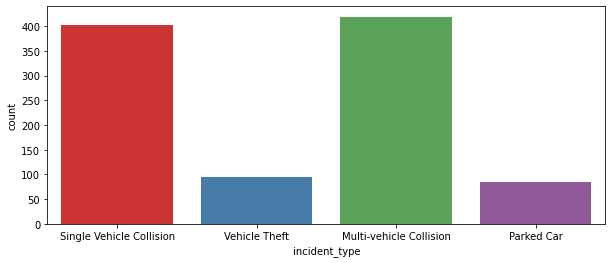

In [83]:
plt.figure(figsize=(10,4),facecolor='white')
sns.countplot(DF['incident_type'], palette="Set1")

Majority of the cases are Multi-vehicle Collision and Single Vehicle Collision.

In [84]:
DF['collision_type'].unique()

array(['Side Collision', 'Rear Collision', 'Front Collision'],
      dtype=object)

There are 3 unique categories in collision_type

<AxesSubplot:xlabel='collision_type', ylabel='count'>

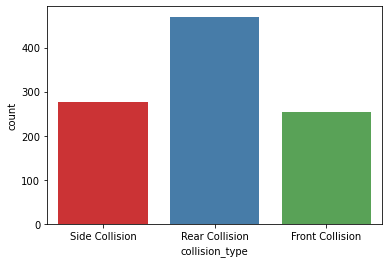

In [85]:
sns.countplot(DF['collision_type'], palette="Set1")

Majority of cases are Rear Collision.

In [86]:
DF['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

There are 4 unique categories in incident_severity

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

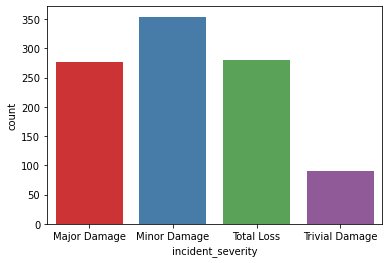

In [87]:
sns.countplot(DF['incident_severity'], palette="Set1")

Minor Damage is most common followed by Major Damage and Total loss.

In [88]:
DF['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

There are 5 unique Categories

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

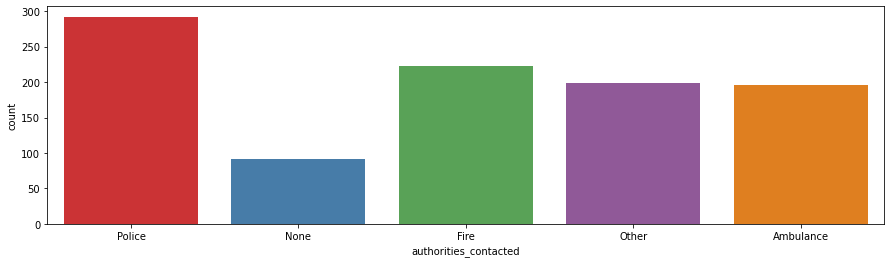

In [89]:
plt.figure(figsize=(15,4),facecolor='white')
sns.countplot(DF['authorities_contacted'], palette="Set1")

Most common aurthorities contacted were the Police followed by Fire force.

In [90]:
DF['incident_state'].value_counts()

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64

<AxesSubplot:xlabel='incident_state', ylabel='count'>

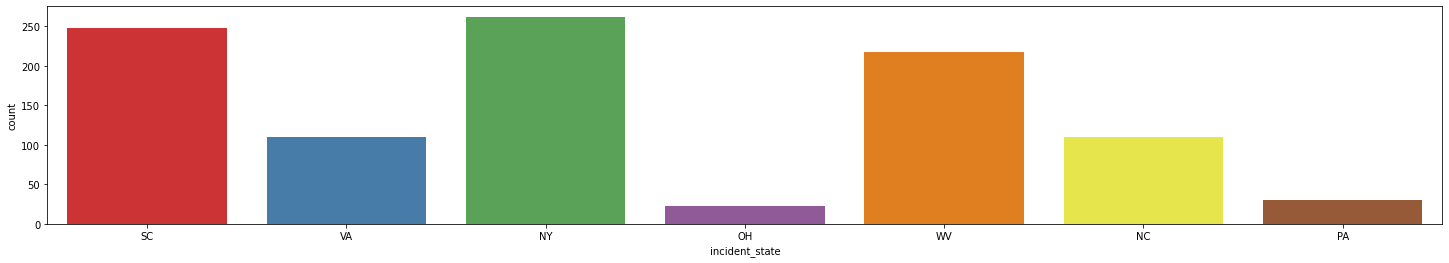

In [91]:
plt.figure(figsize=(25,4),facecolor='white')
sns.countplot(DF['incident_state'], palette="Set1")

Most of the incidents occured in SC,NY and WV

In [92]:
DF['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

<AxesSubplot:xlabel='incident_city', ylabel='count'>

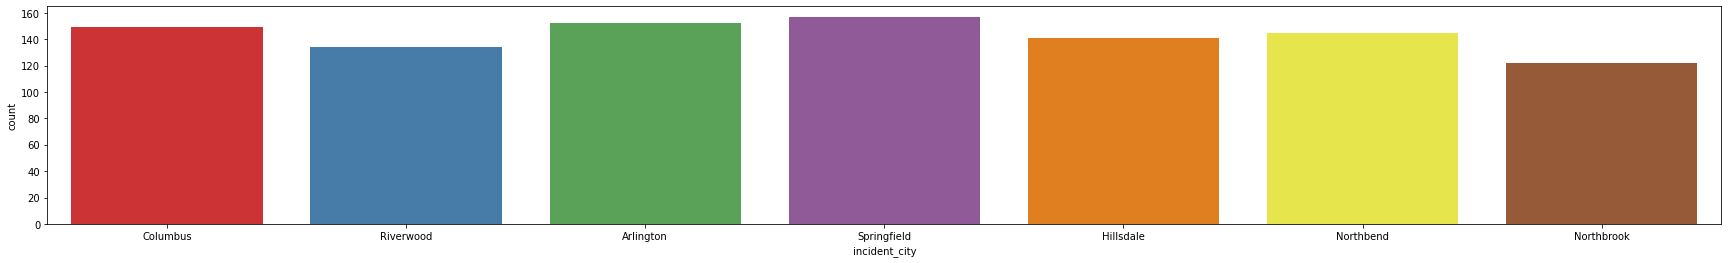

In [93]:
plt.figure(figsize=(30,4),facecolor='white')
sns.countplot(DF['incident_city'], palette="Set1")

Most incidents were reported from Columbus,Arlington, Springfield

In [94]:
DF['incident_location'].value_counts()

2217 Tree Lane         1
4188 Britain Ave       1
7628 4th Lane          1
4814 Lincoln Lane      1
1815 Cherokee Drive    1
                      ..
5051 Elm St            1
4175 Elm Ridge         1
1316 Britain Ridge     1
7002 Oak Hwy           1
2725 Britain Ridge     1
Name: incident_location, Length: 1000, dtype: int64

In [95]:
DF['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

There are 2 unique values.

<AxesSubplot:xlabel='property_damage', ylabel='count'>

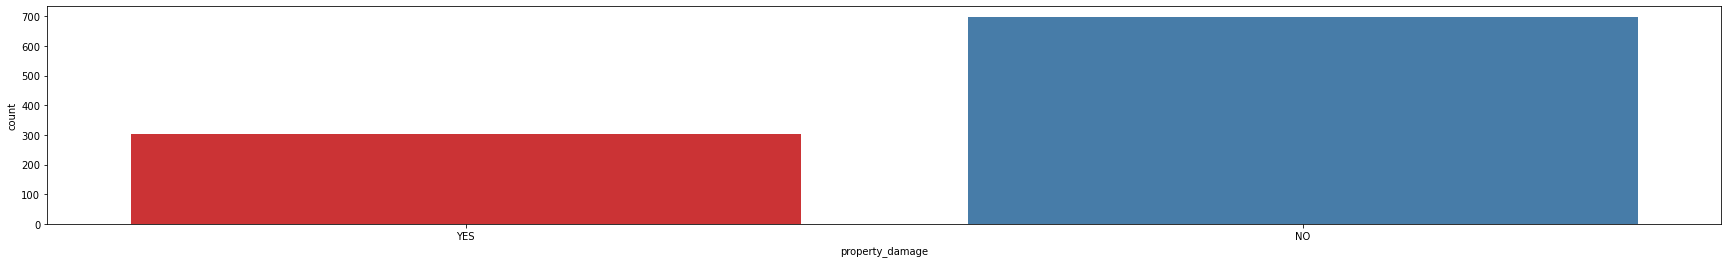

In [96]:
plt.figure(figsize=(30,4),facecolor='white')
sns.countplot(DF['property_damage'], palette="Set1")

Majority reported no property damage.

In [97]:
DF['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

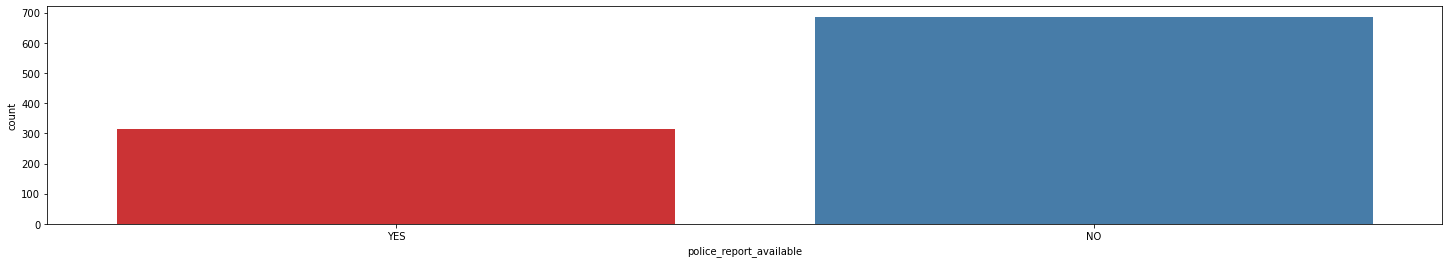

In [98]:
plt.figure(figsize=(25,4),facecolor='white')
sns.countplot(DF['police_report_available'], palette="Set1")

There are no police reports available for most cases.

In [99]:
DF['auto_make'].value_counts()

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

<AxesSubplot:xlabel='auto_make', ylabel='count'>

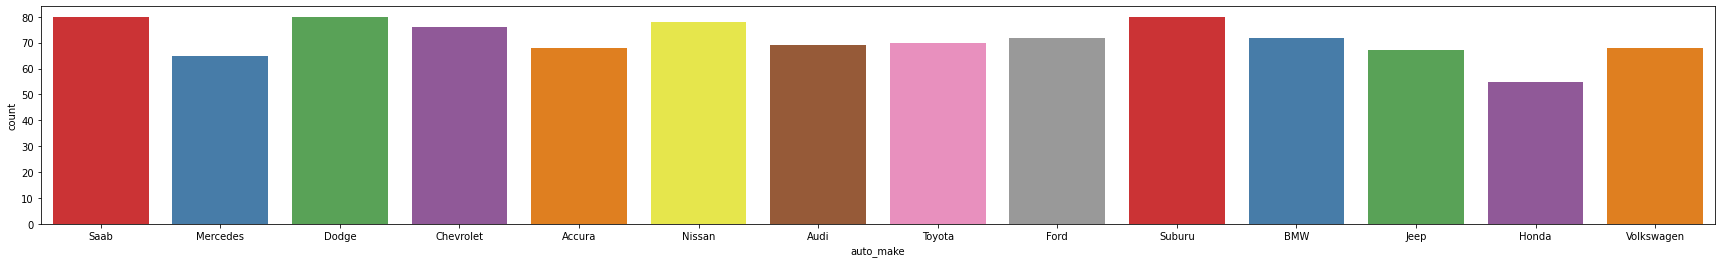

In [100]:
plt.figure(figsize=(30,4),facecolor='white')
sns.countplot(DF['auto_make'], palette="Set1")

Reports are fairly evenly distributed amongst all the classes.

In [101]:
DF['auto_model'].value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
Legacy            32
A5                32
Pathfinder        31
Malibu            30
Forrestor         28
Camry             28
92x               28
E400              27
95                27
F150              27
93                25
Grand Cherokee    25
Maxima            24
Tahoe             24
Escape            24
X5                23
Ultima            23
Highlander        22
Silverado         22
Civic             22
Fusion            21
ML350             20
TL                20
Corolla           20
Impreza           20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

<AxesSubplot:xlabel='auto_model', ylabel='count'>

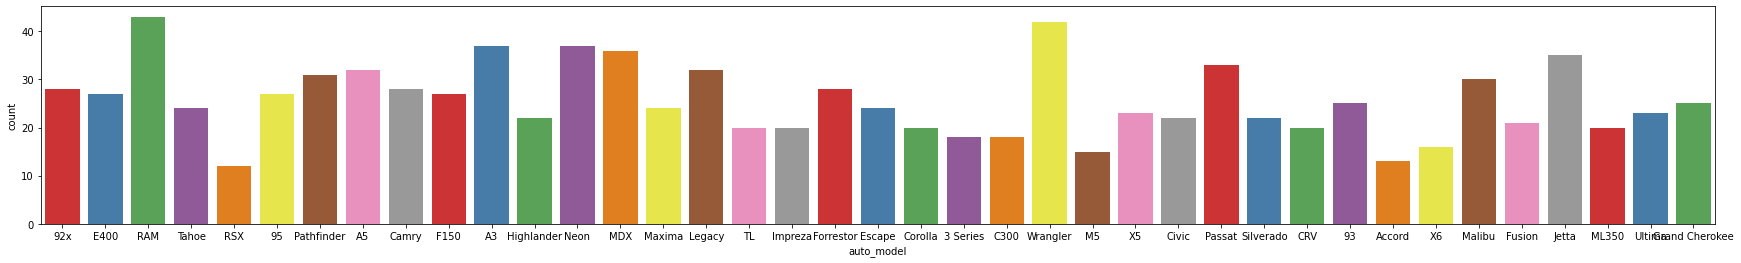

In [102]:
plt.figure(figsize=(30,4),facecolor='white')
sns.countplot(DF['auto_model'], palette="Set1")

most reports belong to models RAM,A3,Wrangler,Neon

#### Analyzing Feature columns with Continuous Data.

In [103]:
DF.dtypes[DF.dtypes != 'object'] #Identifying the Continuous/Discrete Columns

months_as_customer               int64
age                              int64
policy_number                    int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
capital-gains                    int64
capital-loss                     int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
auto_year                        int64
Bind_Age                         int64
incident_month                   int64
dtype: object

Extracting Age from auto_year

In [104]:
DF['auto_age'] = DF['auto_year'].apply(lambda y: 2016 - y)

In [105]:
DF.drop(columns=['auto_year'],inplace=True) # dropping auto_year since it is no longer needed

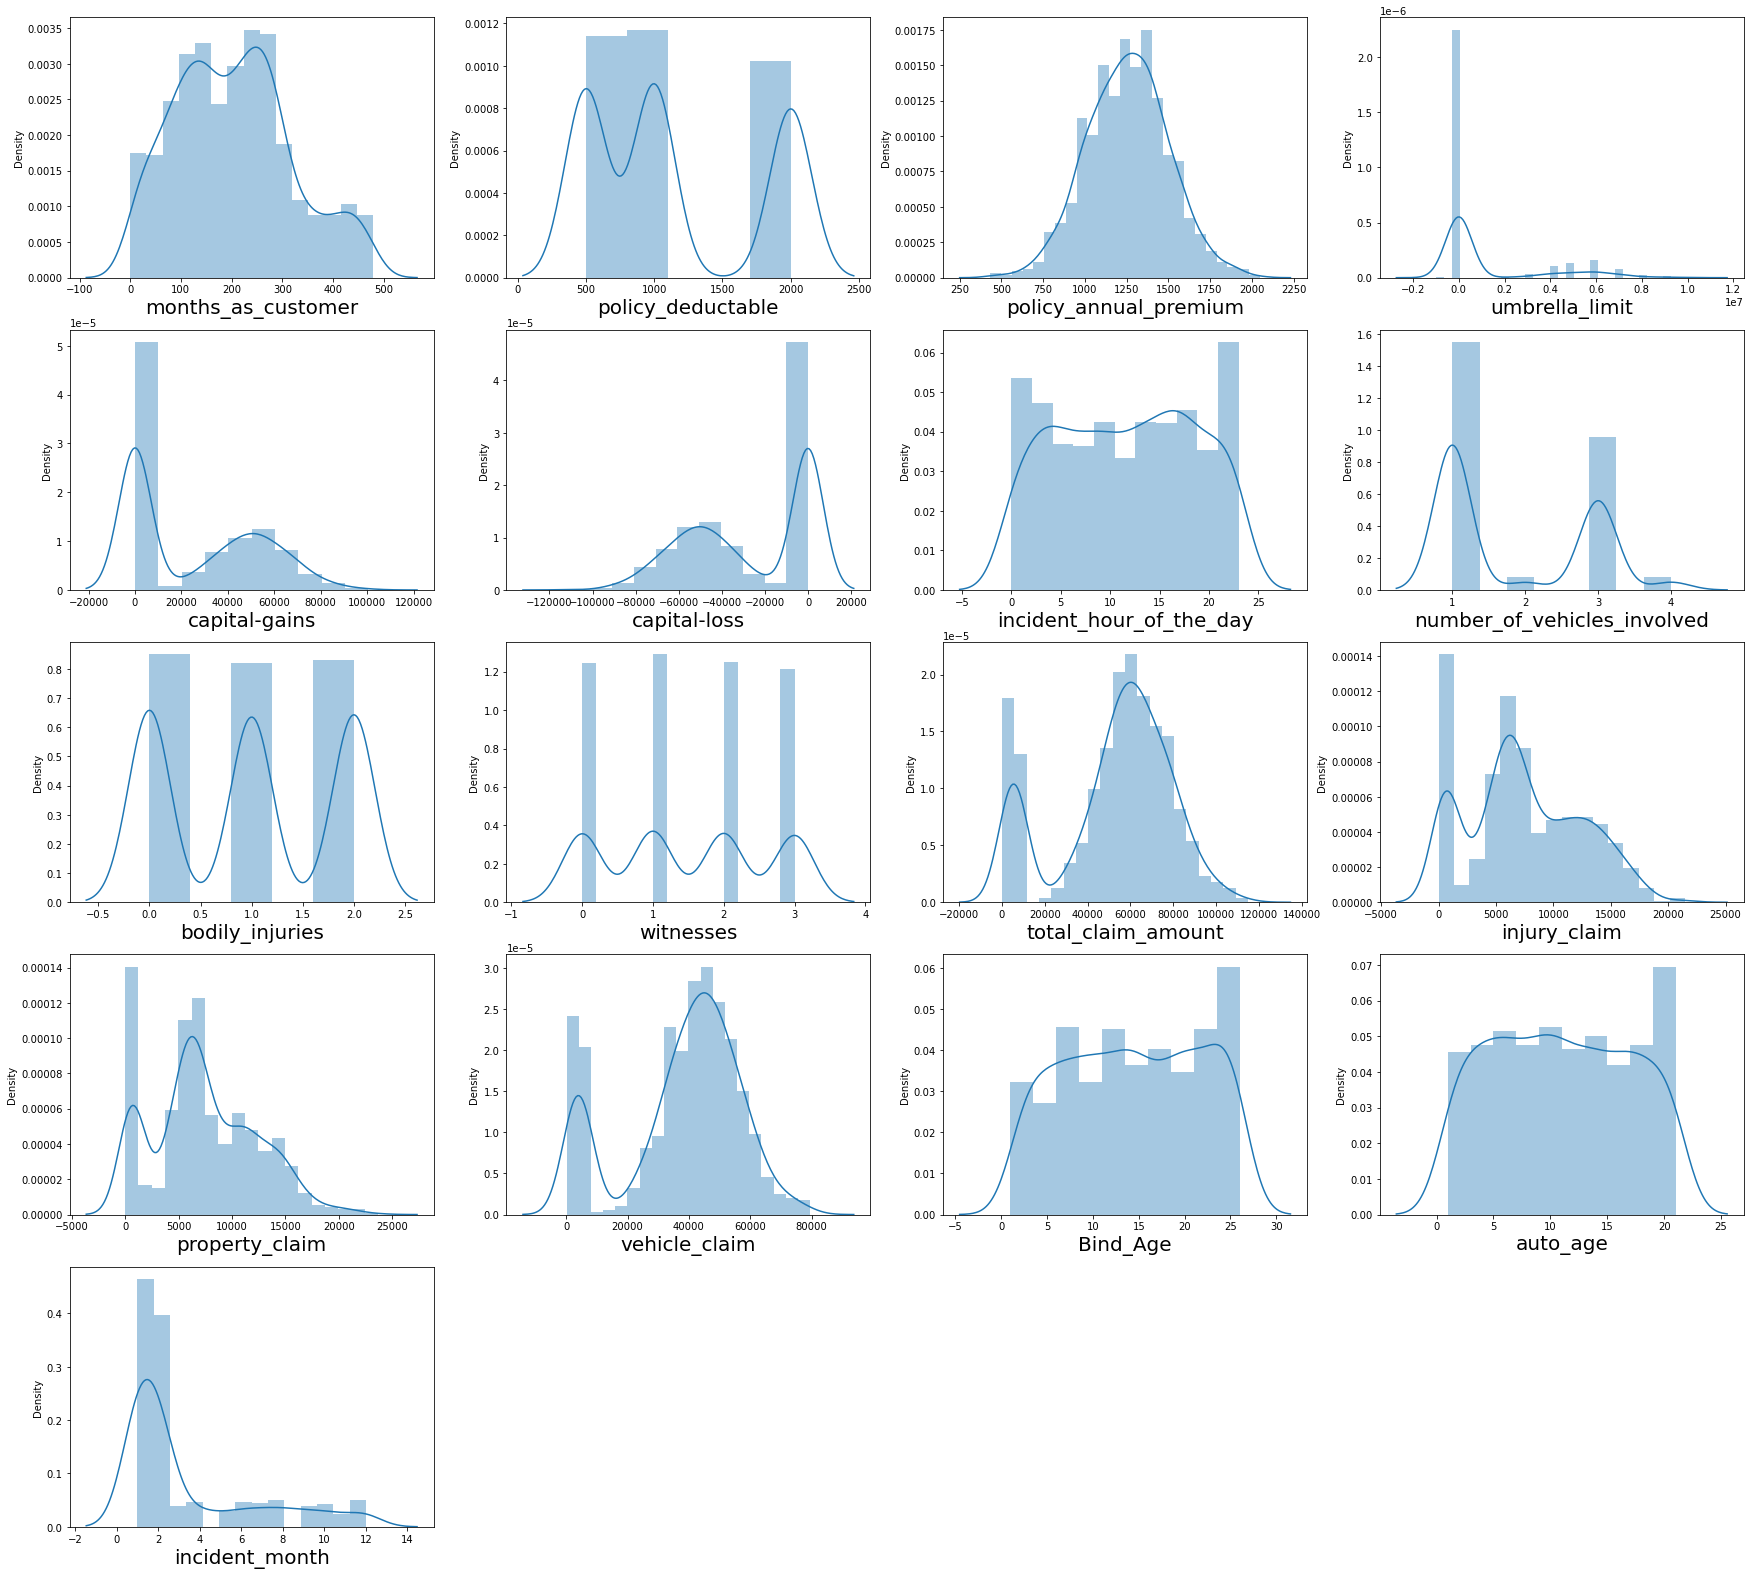

In [107]:
plt.figure(figsize=(30,45),facecolor='white')
plotnum=1
for col in DF[['months_as_customer','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim','Bind_Age','auto_age','incident_month']]:
    if plotnum<=30:
        plt.subplot(8,4,plotnum)
        sns.distplot(DF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Most continuous distributions are normally distributed and are multimodal.

In [108]:
DF.incident_month.value_counts()

1     365
2     312
8      39
12     39
6      37
4      36
7      35
10     34
3      31
9      30
5      23
11     19
Name: incident_month, dtype: int64

<AxesSubplot:xlabel='incident_month', ylabel='count'>

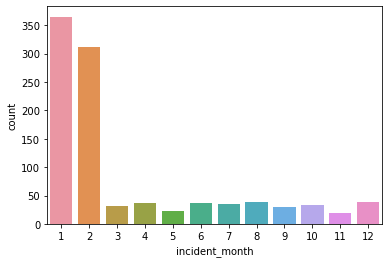

In [109]:
sns.countplot(DF.incident_month)

Most incidents take place between January and February

In [110]:
DF[['months_as_customer','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim','Bind_Age','auto_age']].skew()

months_as_customer             0.362177
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
Bind_Age                      -0.052511
auto_age                       0.048289
dtype: float64

vehicle_claim,total_claim_amount and umbrella_limit are skewed. 

Dropping unnecessary columns

In [111]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

In [112]:
DF.drop(columns=['policy_number','insured_zip','incident_location'],inplace=True)

In [113]:
DF.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,Bind_Age,incident_month,auto_age
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,71610,6510,13020,52080,Saab,92x,Y,2,1,12
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,5070,780,780,3510,Mercedes,E400,Y,10,1,9
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,34650,7700,3850,23100,Dodge,RAM,N,16,2,9
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,63400,6340,6340,50720,Chevrolet,Tahoe,Y,26,10,2
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,6500,1300,650,4550,Accura,RSX,N,2,2,7


### Interpreting Relationship between Dependent Variable and Independent Variables

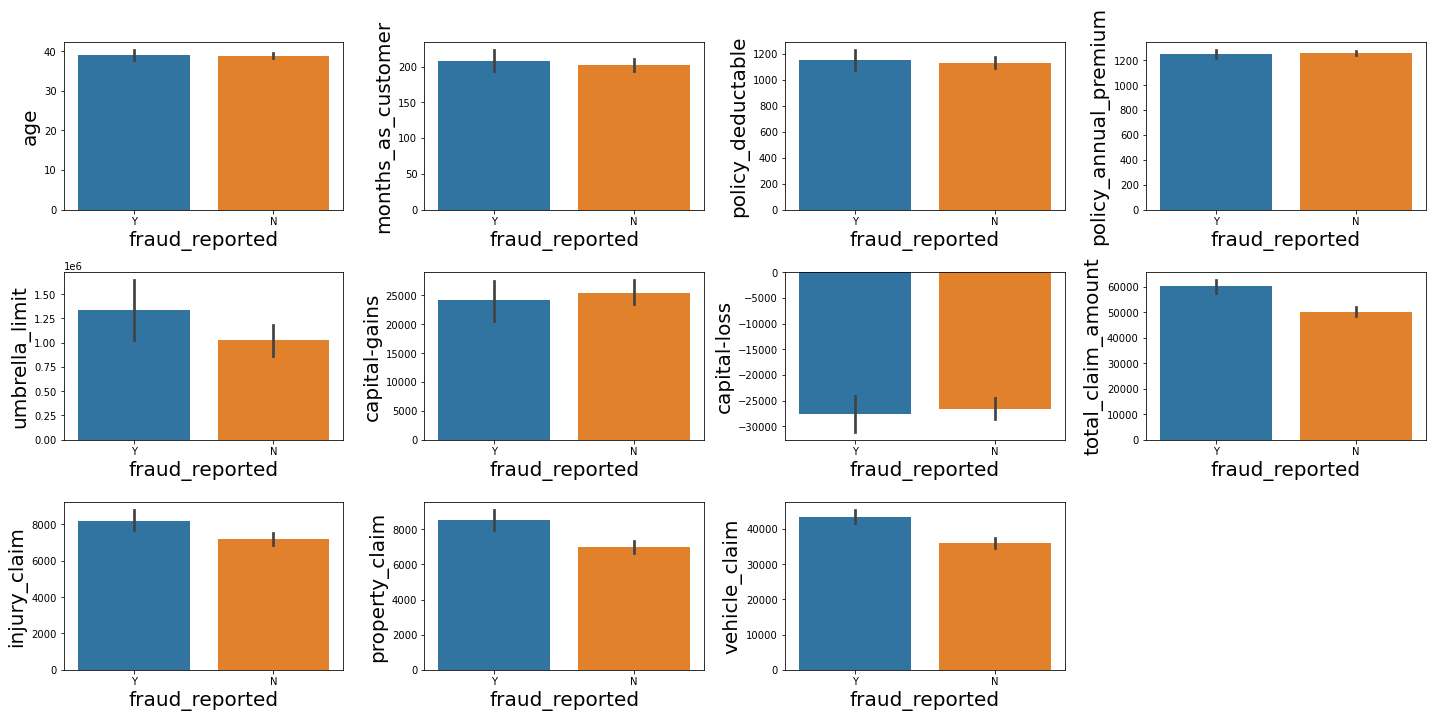

In [114]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = DF['fraud_reported']
X = DF[['age','months_as_customer','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','total_claim_amount','injury_claim','property_claim','vehicle_claim']]
for col in X:
    if plotnum<=30:
        plt.subplot(8,4,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('fraud_reported',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

Some observations:
    
'age','months_as_customer','policy_deductable','policy_annual_premium','capital-gains','capital-loss', don't seem to contribute to fraud probability.

Higher the umbrella limit, more the fraud claims are filed.

Higher the total claim amount, more the fraud claims are filed.

Higher the injury claim amount, more the fraud claims are filed.

Higher the property claim amount, more the fraud claims are filed.

Higher the vehicle claim amount, more the fraud claims are filed.

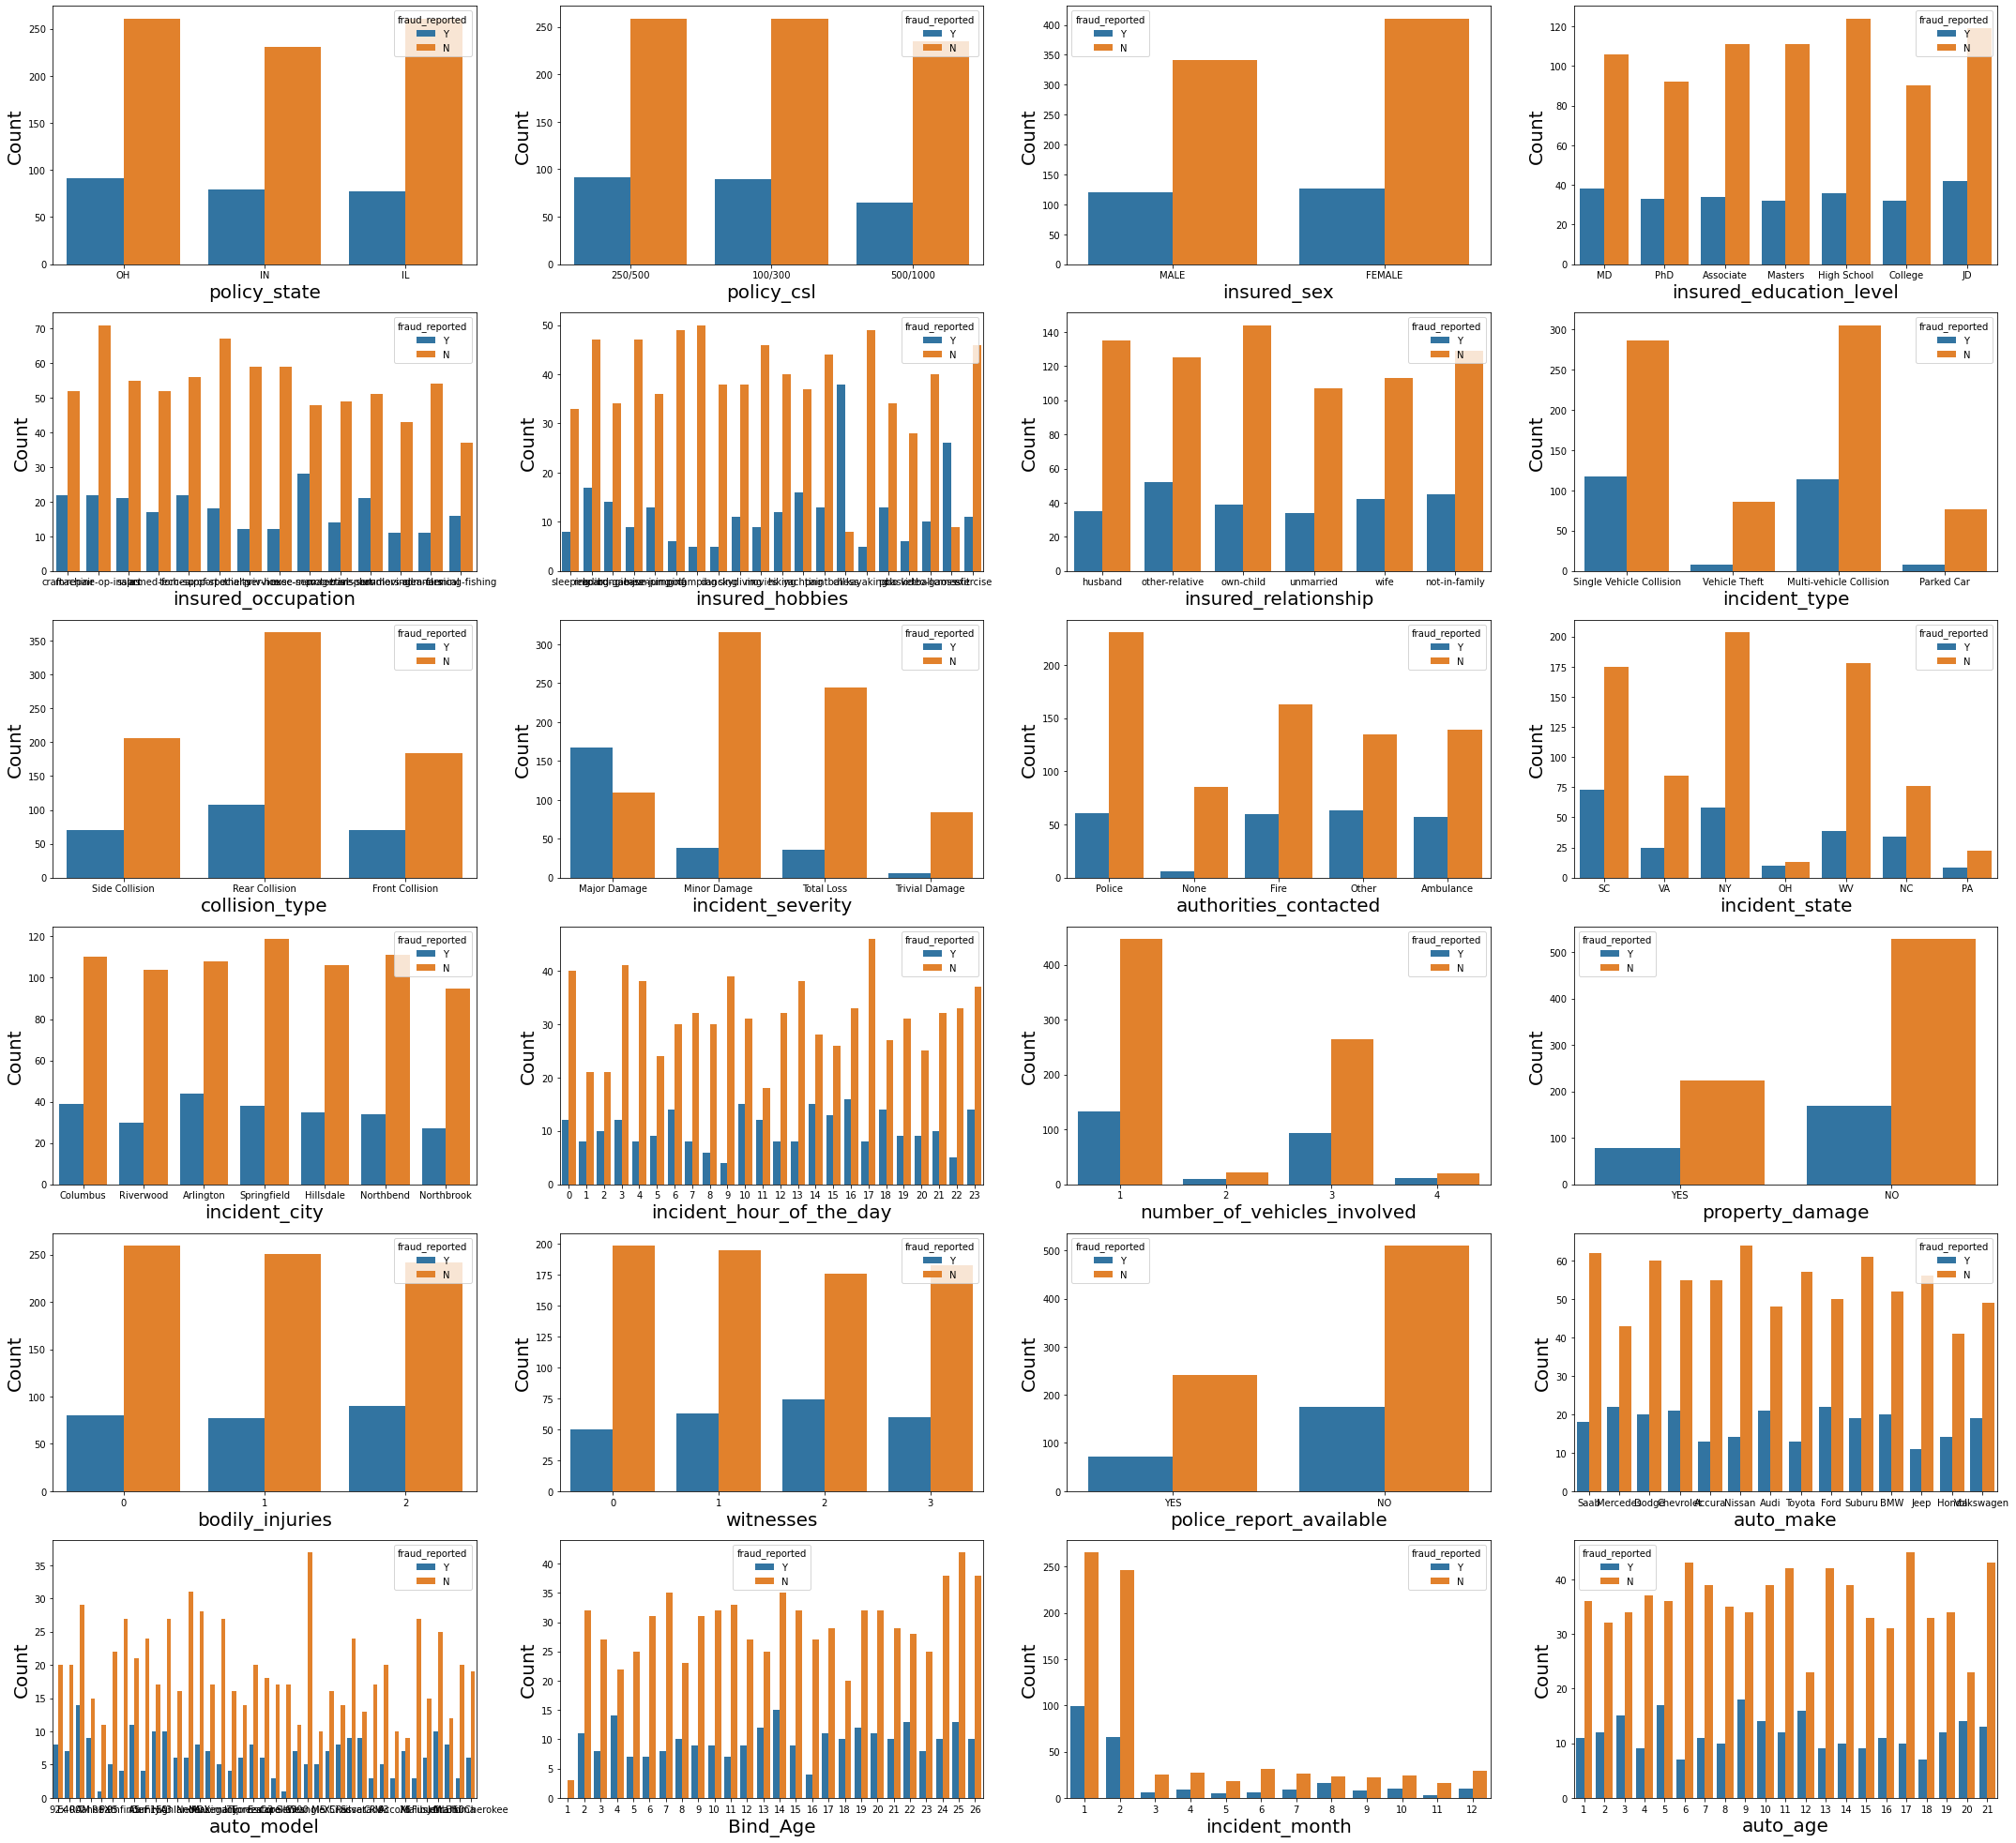

In [115]:
plt.figure(figsize=(30,45),facecolor='white')
plotnum=1
y = DF['fraud_reported']
X = DF.drop(columns=['fraud_reported','age','months_as_customer','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','total_claim_amount','injury_claim','property_claim','vehicle_claim'])
for col in X:
    if plotnum<=40:
        plt.subplot(10,4,plotnum)
        sns.countplot(X[col],hue =y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum+=1
plt.tight_layout()

Some observations:
    
policy state,policy csl,insured sex,authorities contacted,bodily injuries,incident city, witnesses don't seem to contribute to fraud probability.

Education levels of JD and Highschool and MD contribute most to the fraud claims filed.

relationships other relative and not in family contribute most to the fraud claims filed.

Single vehicle collision and multi vehicle collision contribute most to the fraud claims filed.

Incidents in states SC and NY contribute most to the fraud claims filed.

fraud claims are more for 1 and 3 vehicles involved in accident

fraud claims are more for rear collision in accident

fraud claims are most for Major damage reported

fraud claims are most for hours 10,14,16,18(office rush hours) and 23 of the day

fraud claims are more when no property damage is reported


fraud claims are more when no police report is available

fraud claims are more during months 1(january) and 2(february).

fraud claims are policy bind ages 2,4,13 and 14

fraud claims are most for car age 3,5,9,12,20,21.


<AxesSubplot:xlabel='auto_model', ylabel='count'>

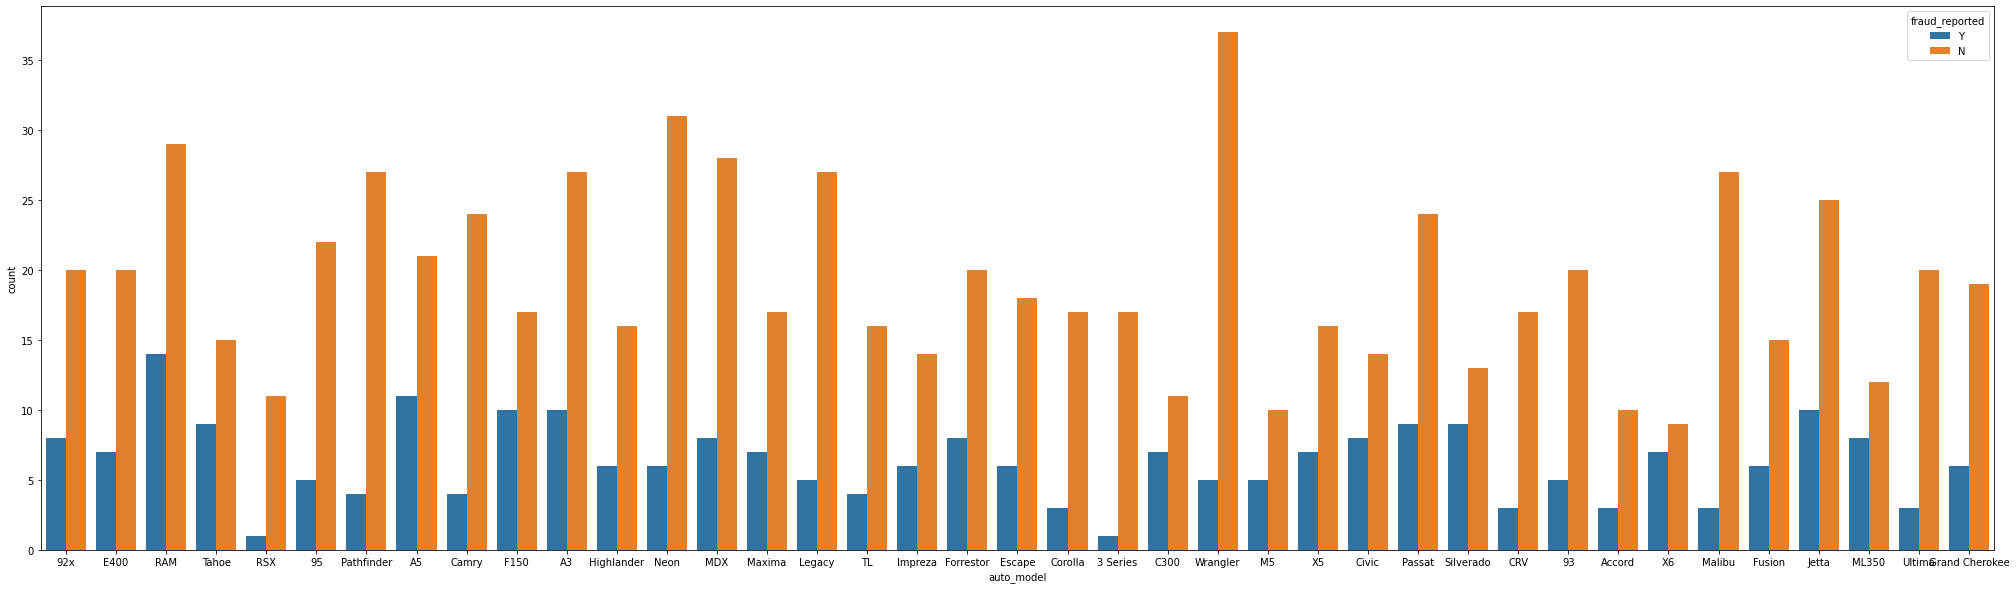

In [117]:
plt.figure(figsize=(35,10),facecolor='white')
sns.countplot(DF.auto_model,hue =DF.fraud_reported)

Ram,A5,Jetta,ML350,Passat,F150,A3 have the highest fraud insurance claims, while 3 series,RSX,Camry have the lowest.

Wrangler,Passat,95,Neon,Malibu,Grand Cherokee,auto_model_Ultima,Corolla,,TL,Legacy have the highest legitimate claims.

<AxesSubplot:xlabel='auto_make', ylabel='count'>

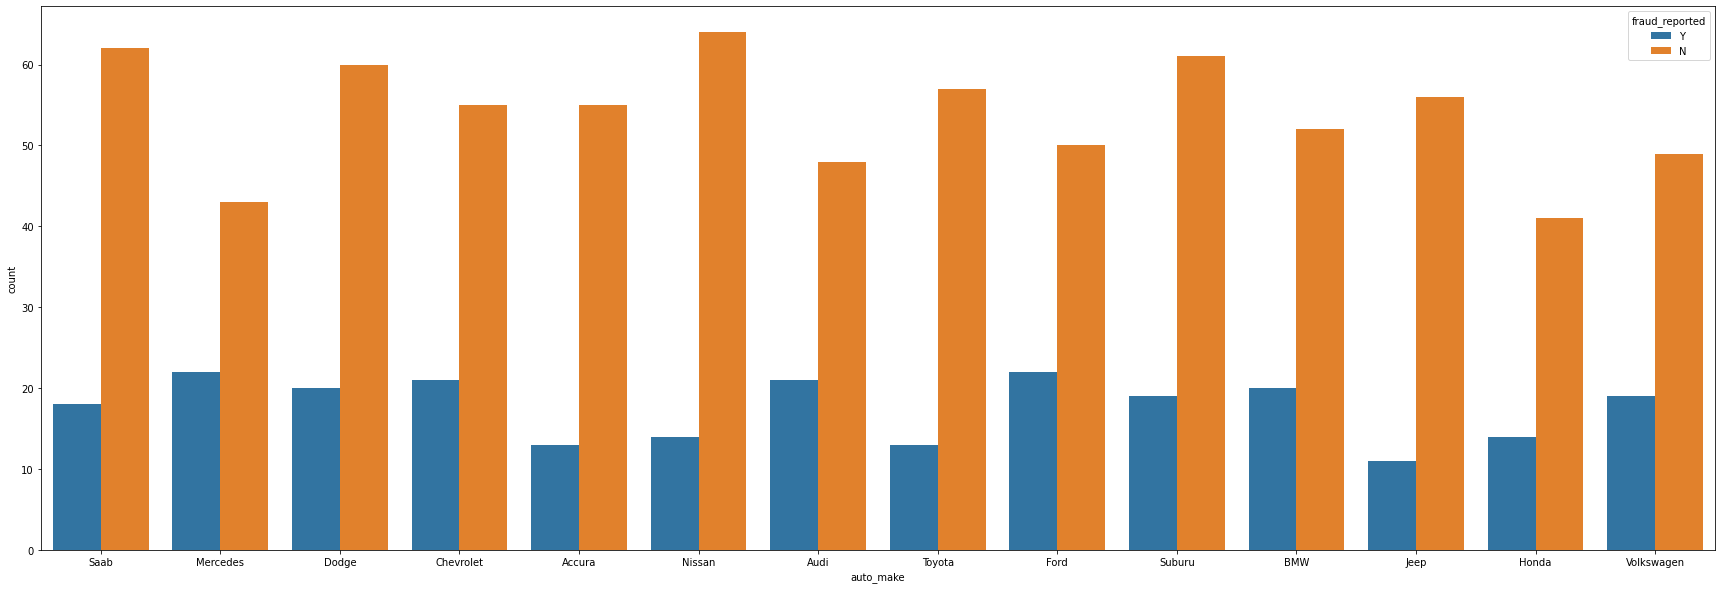

In [118]:
plt.figure(figsize=(30,10),facecolor='white')
sns.countplot(DF.auto_make,hue =DF.fraud_reported)

Mercedes,Dodge,Chevrolet,Audi,Ford,Volkswagen have the highest fraud insurance claims

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

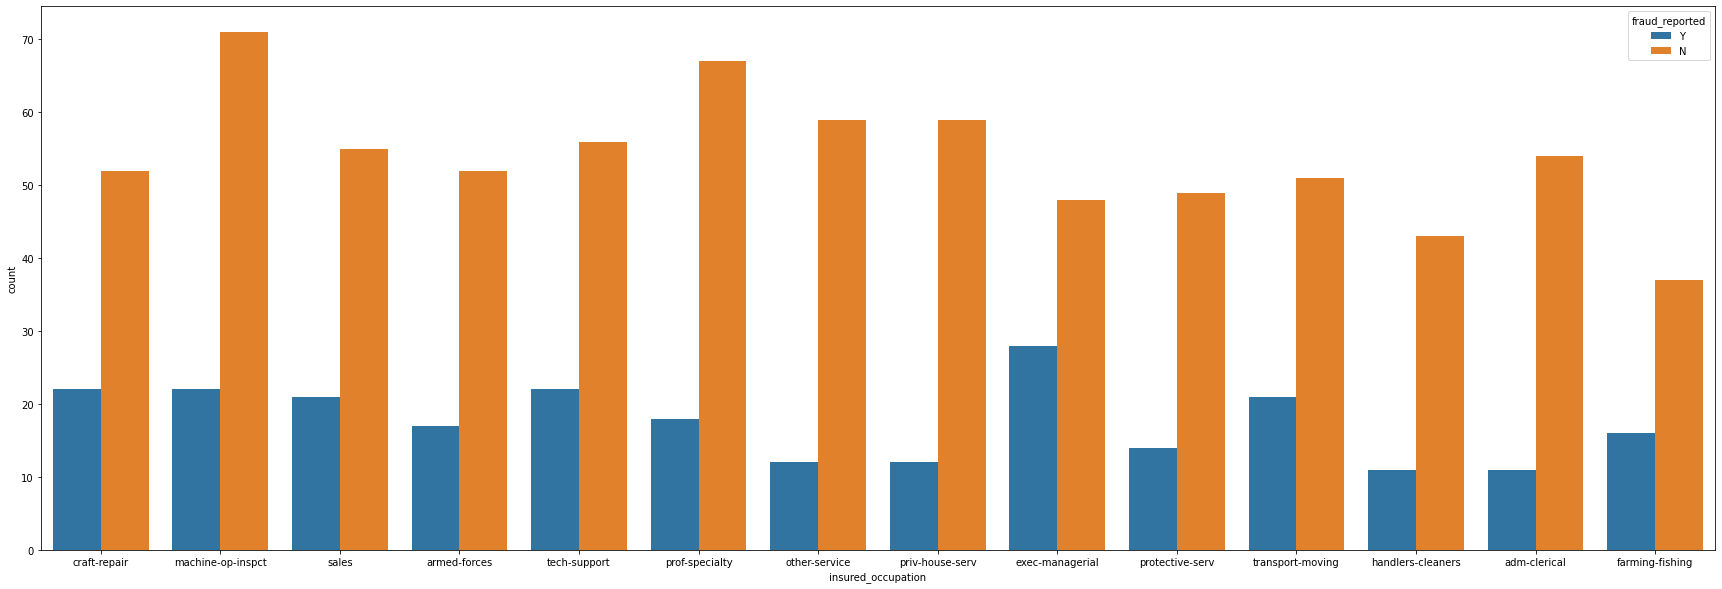

In [119]:
plt.figure(figsize=(30,10),facecolor='white')
sns.countplot(DF.insured_occupation,hue =DF.fraud_reported)

Most fraud reports were filed by exec manegerial,Transport moving and Craft repair

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

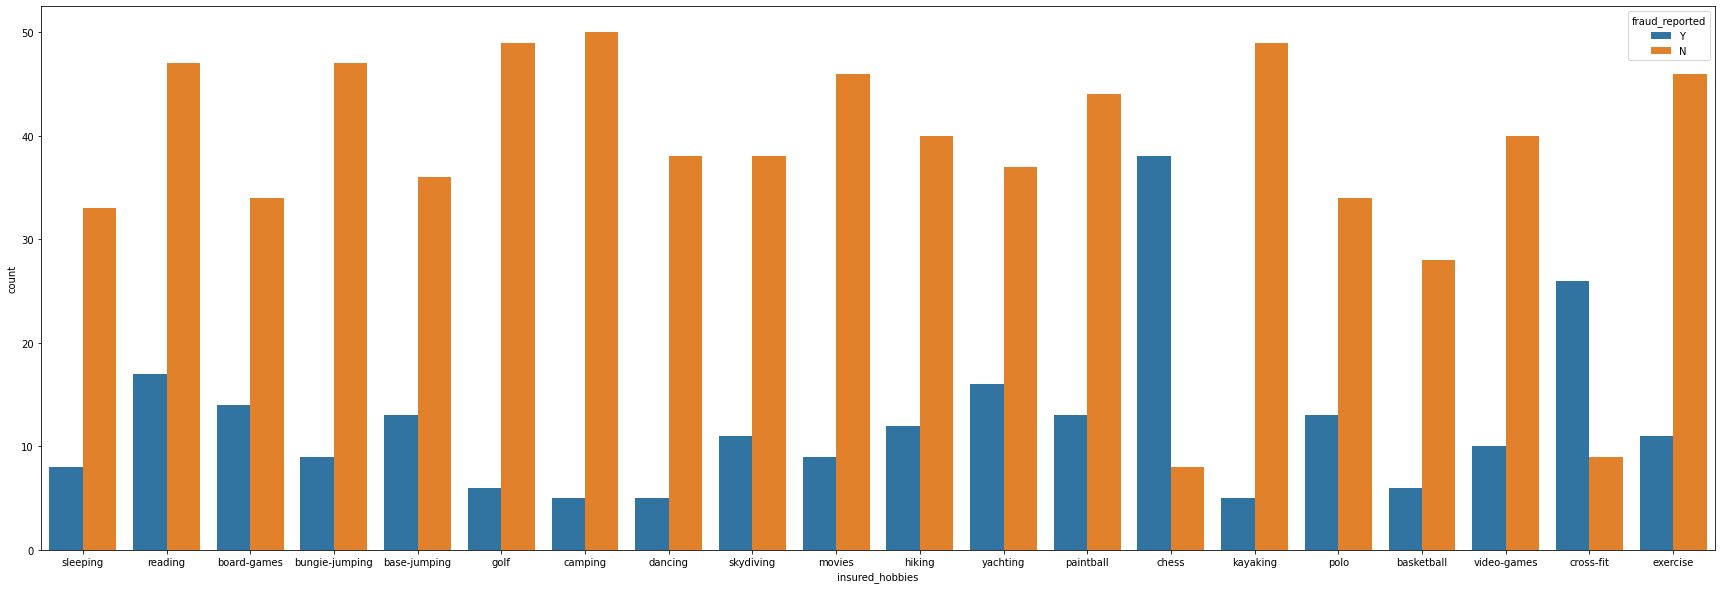

In [116]:
plt.figure(figsize=(30,10),facecolor='white')
sns.countplot(DF.insured_hobbies,hue =DF.fraud_reported)

most fraud claimants have chess and cross fit as hobbies

In [120]:
DF.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
Bind_Age                      -0.052511
incident_month                 1.375894
auto_age                       0.048289
dtype: float64

### Checking for Outliers in columns with continuous distribution

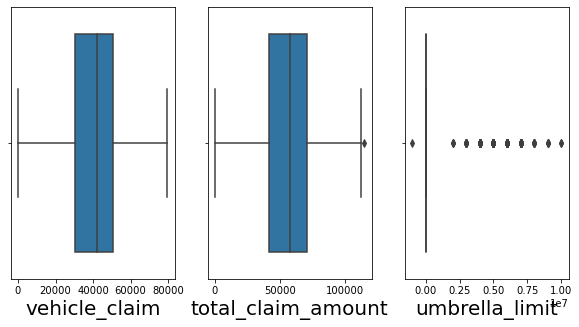

In [121]:
plt.figure(figsize=(10,5),facecolor='white')
plotnum=1
for col in DF[['vehicle_claim','total_claim_amount','umbrella_limit']]:
    if plotnum<=3:
        plt.subplot(1,3,plotnum)
        sns.boxplot(DF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

#### Removing Outliers through z Score

In [123]:
df=DF[['vehicle_claim','total_claim_amount','umbrella_limit']]

In [124]:
from scipy.stats import zscore
zscor = zscore(df)
z_score_abs = np.abs(zscor)

df2 = df[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [125]:
df2.shape

(985, 3)

In [126]:
df.shape

(1000, 3)

Data Loss

In [127]:
loss=(1000-985)/1000 * 100
loss

1.5

In [128]:
dropindx = DF.index.difference(df2.index)

In [129]:
DF.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe

In [130]:
DF.reset_index(drop=True,inplace = True) #resetting the index of the dataframe

In [131]:
DF.shape

(985, 36)

Checking for skewness

In [132]:
DF.skew()

months_as_customer             0.365896
age                            0.480506
policy_deductable              0.478157
policy_annual_premium          0.007310
umbrella_limit                 1.809619
capital-gains                  0.466050
capital-loss                  -0.388917
incident_hour_of_the_day      -0.034538
number_of_vehicles_involved    0.509302
bodily_injuries                0.005614
witnesses                      0.018336
total_claim_amount            -0.596347
injury_claim                   0.266229
property_claim                 0.380325
vehicle_claim                 -0.623873
Bind_Age                      -0.056898
incident_month                 1.388600
auto_age                       0.053018
dtype: float64

vehicle_claim,total_claim_amount and umbrella_limit are skewed. 

#### Reducing skewness  using PowerTransformer

In [133]:
from sklearn.preprocessing import PowerTransformer

In [134]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [153]:
from scipy import stats

In [161]:
df4 = DF[['vehicle_claim','total_claim_amount']]

In [162]:
df4.skew()

vehicle_claim        -0.623873
total_claim_amount   -0.596347
dtype: float64

In [163]:
transformed= powtrans.fit_transform(df4)

In [164]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe

In [165]:
transformed.skew()

vehicle_claim        -0.523516
total_claim_amount   -0.510401
dtype: float64

In [166]:
transformed.index = DF.index

In [167]:
DF[['vehicle_claim','total_claim_amount']]=transformed[['vehicle_claim','total_claim_amount']]

In [168]:
DF

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,Bind_Age,incident_month,auto_age
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,0.717599,6510,13020,0.756928,Saab,92x,Y,2,1,12
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,-1.778007,780,780,-1.787462,Mercedes,E400,Y,10,1,9
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,-0.717646,7700,3850,-0.821611,Dodge,RAM,N,16,2,9
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,0.392566,6340,6340,0.680587,Chevrolet,Tahoe,Y,26,10,2
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,-1.730906,1300,650,-1.740977,Accura,RSX,N,2,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,3,38,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,...,1.342307,17440,8720,1.264162,Honda,Accord,N,25,2,10
981,285,41,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,...,2.208422,18080,18080,1.912193,Volkswagen,Passat,N,2,1,1
982,130,34,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,...,0.554514,7500,7500,0.780540,Suburu,Impreza,N,13,1,20
983,458,62,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,...,-0.247641,5220,5220,-0.103525,Audi,A5,N,5,2,18


### Encoding the  categorical Feature Columns.

In [169]:
DF.dtypes[DF.dtypes == 'object'] #Identifying the Categorical Columns

policy_state               object
policy_csl                 object
insured_sex                object
insured_education_level    object
insured_occupation         object
insured_hobbies            object
insured_relationship       object
incident_type              object
collision_type             object
incident_severity          object
authorities_contacted      object
incident_state             object
incident_city              object
property_damage            object
police_report_available    object
auto_make                  object
auto_model                 object
fraud_reported             object
dtype: object

In [170]:
DF.nunique()

months_as_customer             388
age                             46
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          976
umbrella_limit                   8
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  335
capital-loss                   352
incident_type                    4
collision_type                   3
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  2
bodily_injuries                  3
witnesses                        4
police_report_available          2
total_claim_amount             756
injury_claim                   635
property_claim      

In [171]:
DF['insured_sex'] = DF.insured_sex.map({'MALE':1,'FEMALE':2})

In [172]:
DF['police_report_available'] = DF.property_damage.map({'YES':2,'NO':1})

In [173]:
DF['property_damage'] = DF.property_damage.map({'YES':2,'NO':1})

Encoding the categorical data using Label Encoding Technique

In [174]:
from sklearn.preprocessing import LabelEncoder

In [175]:
labenc = LabelEncoder()

In [176]:
categ = ['authorities_contacted','incident_severity','collision_type','incident_type','insured_relationship','insured_education_level','policy_csl','policy_state']

In [177]:
for col in categ:
    DF[col] = labenc.fit_transform(DF[col])

In [178]:
DF[['auto_make']]= labenc.fit_transform(DF[['auto_make']])

In [179]:
DF.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,Bind_Age,incident_month,auto_age
0,328,48,2,1,1000,1406.91,0,1,4,craft-repair,...,0.717599,6510,13020,0.756928,10,92x,Y,2,1,12
1,228,42,1,1,2000,1197.22,5000000,1,4,machine-op-inspct,...,-1.778007,780,780,-1.787462,8,E400,Y,10,1,9
2,134,29,2,0,2000,1413.14,5000000,2,6,sales,...,-0.717646,7700,3850,-0.821611,4,RAM,N,16,2,9
3,256,41,0,1,2000,1415.74,6000000,2,6,armed-forces,...,0.392566,6340,6340,0.680587,3,Tahoe,Y,26,10,2
4,228,44,0,2,1000,1583.91,6000000,1,0,sales,...,-1.730906,1300,650,-1.740977,0,RSX,N,2,2,7


### Encoding the Label Column.

In [180]:
DF['fraud_reported'] = DF.fraud_reported.map({'Y':1,'N':0}) #'Y' = 1 and 'N' = 0

In [181]:
DF.dtypes[DF.dtypes == 'object'] #Identifying the Categorical Columns

insured_occupation    object
insured_hobbies       object
incident_state        object
incident_city         object
auto_model            object
dtype: object

encoding above columns using get_dummies()

In [182]:
DF2 = DF[['insured_occupation','insured_hobbies','incident_state','incident_city','auto_model','fraud_reported']].copy()

In [183]:
dumm = pd.get_dummies(DF[['insured_occupation','insured_hobbies','incident_state','incident_city','auto_model']],drop_first = False)

In [184]:
dumm.columns

Index(['insured_occupation_adm-clerical', 'insured_occupation_armed-forces',
       'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving', 'insured_hobbies_base-jumping',
       'insured_hobbies_basketball', 'insured_hobbies_board-games',
       'insured_hobbies_bungie-jumping', 'insured_hobbies_camping',
       'insured_hobbies_chess', 'insured_hobbies_cross-fit',
       'insured_hobbies_dancing', 'insured_hobbies_exercise',
       'insured_hobbies_golf', 'insured_hobbies_hiking',
       'insured_hobbies_kayaking', 'insured_hobbies_movies',
  

Creating a dataframe with the most important categories

In [185]:
dumm2 = dumm[['insured_occupation_craft-repair','insured_occupation_machine-op-inspct','insured_occupation_tech-support','incident_state_SC','incident_state_NY','insured_occupation_craft-repair','insured_occupation_transport-moving','insured_occupation_exec-managerial','insured_hobbies_cross-fit','insured_hobbies_chess','auto_model_Legacy','auto_model_TL','auto_model_Corolla','auto_model_Ultima','auto_model_Grand Cherokee','auto_model_Malibu','auto_model_Neon','auto_model_95','auto_model_Wrangler','auto_model_Camry','auto_model_RSX','auto_model_RAM','auto_model_A5','auto_model_Jetta','auto_model_ML350','auto_model_Passat','auto_model_F150','auto_model_A3','auto_model_3 Series']].copy()

In [186]:
DF = DF.join(dumm2) 

In [187]:
DF.drop(columns=['insured_occupation','insured_hobbies','incident_state','incident_city','auto_model'],inplace=True)

In [188]:
DF

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_relationship,...,auto_model_Camry,auto_model_RSX,auto_model_RAM,auto_model_A5,auto_model_Jetta,auto_model_ML350,auto_model_Passat,auto_model_F150,auto_model_A3,auto_model_3 Series
0,328,48,2,1,1000,1406.91,0,1,4,0,...,0,0,0,0,0,0,0,0,0,0
1,228,42,1,1,2000,1197.22,5000000,1,4,2,...,0,0,0,0,0,0,0,0,0,0
2,134,29,2,0,2000,1413.14,5000000,2,6,3,...,0,0,1,0,0,0,0,0,0,0
3,256,41,0,1,2000,1415.74,6000000,2,6,4,...,0,0,0,0,0,0,0,0,0,0
4,228,44,0,2,1000,1583.91,6000000,1,0,4,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,3,38,2,2,1000,1310.80,0,2,5,4,...,0,0,0,0,0,0,0,0,0,0
981,285,41,0,0,1000,1436.79,0,2,6,5,...,0,0,0,0,0,0,1,0,0,0
982,130,34,2,1,500,1383.49,3000000,2,5,2,...,0,0,0,0,0,0,0,0,0,0
983,458,62,0,2,2000,1356.92,5000000,1,0,5,...,0,0,0,1,0,0,0,0,0,0


### Finding Correlation 

In [189]:
i_corr =DF.corr()

In [190]:
i_corr

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_relationship,...,auto_model_Camry,auto_model_RSX,auto_model_RAM,auto_model_A5,auto_model_Jetta,auto_model_ML350,auto_model_Passat,auto_model_F150,auto_model_A3,auto_model_3 Series
months_as_customer,1.000000,0.922960,-0.007565,-0.025793,0.034096,0.004596,0.020265,-0.061723,-0.000733,0.069927,...,-0.039733,-0.000167,0.000866,-0.048081,0.005077,0.074742,0.040777,0.004371,0.006508,-0.047594
age,0.922960,1.000000,-0.019311,-0.016123,0.034282,0.013860,0.014971,-0.074301,0.001113,0.074883,...,-0.041481,-0.004306,-0.006705,-0.036234,0.021599,0.080987,0.022114,-0.012713,0.003640,-0.039906
policy_state,-0.007565,-0.019311,1.000000,0.003019,0.016834,0.013056,-0.010261,0.019168,-0.029000,-0.016729,...,-0.040774,0.008569,-0.034895,-0.045652,-0.011068,-0.012018,-0.004189,0.064840,0.008274,-0.059429
policy_csl,-0.025793,-0.016123,0.003019,1.000000,0.007164,0.025669,0.012136,0.005922,0.007111,-0.032742,...,-0.034583,0.018668,0.019945,-0.038066,-0.028573,0.036140,0.047785,-0.028788,0.019369,-0.010860
policy_deductable,0.034096,0.034282,0.016834,0.007164,1.000000,-0.002505,0.013967,0.006342,0.014766,-0.018824,...,0.021773,-0.017253,0.009181,0.057482,0.006473,-0.043974,0.007303,-0.010891,0.034514,0.002281
policy_annual_premium,0.004596,0.013860,0.013056,0.025669,-0.002505,1.000000,-0.011690,-0.037956,-0.019631,0.000223,...,0.038554,0.002644,0.004214,0.021929,0.036335,-0.012651,-0.006091,0.002432,0.002059,0.003135
umbrella_limit,0.020265,0.014971,-0.010261,0.012136,0.013967,-0.011690,1.000000,-0.019275,-0.031125,0.094930,...,-0.004708,0.066307,-0.033895,-0.015097,0.008974,-0.016114,0.009370,0.024974,-0.082052,-0.002858
insured_sex,-0.061723,-0.074301,0.019168,0.005922,0.006342,-0.037956,-0.019275,1.000000,-0.011579,-0.002327,...,-0.000112,-0.008026,-0.000496,-0.024725,-0.041364,-0.024838,0.027783,-0.024598,0.023196,-0.001762
insured_education_level,-0.000733,0.001113,-0.029000,0.007111,0.014766,-0.019631,-0.031125,-0.011579,1.000000,-0.030540,...,0.041056,-0.030958,-0.016042,-0.054997,0.043259,0.021374,0.018565,-0.009645,0.001273,-0.021289
insured_relationship,0.069927,0.074883,-0.016729,-0.032742,-0.018824,0.000223,0.094930,-0.002327,-0.030540,1.000000,...,-0.024604,0.005266,0.014566,0.005282,0.023787,0.019676,-0.013942,0.034186,-0.036700,-0.005312


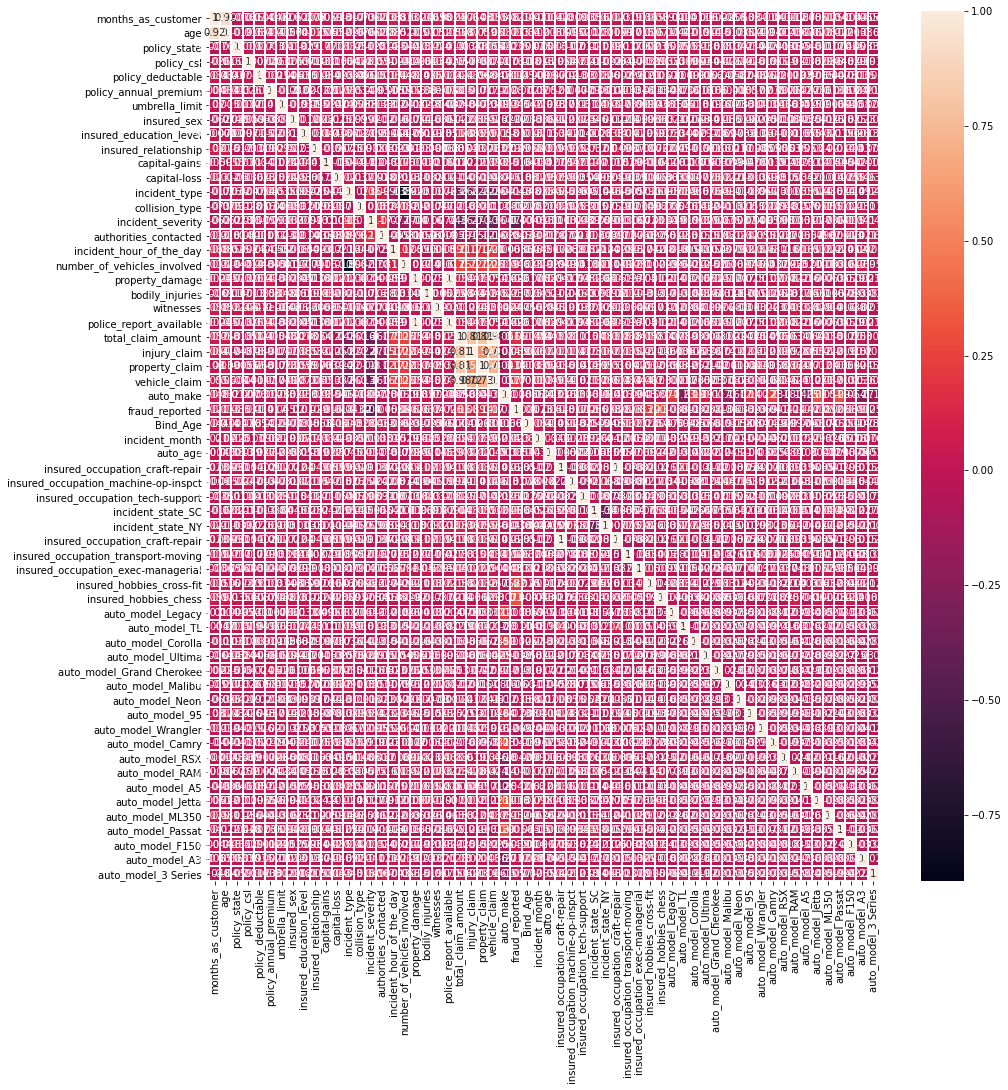

In [191]:
plt.figure(figsize=(15,16))
sns.heatmap(i_corr,annot=True,linewidth=1)
plt.show()

### Visualizing correlation of feature columns with label column.

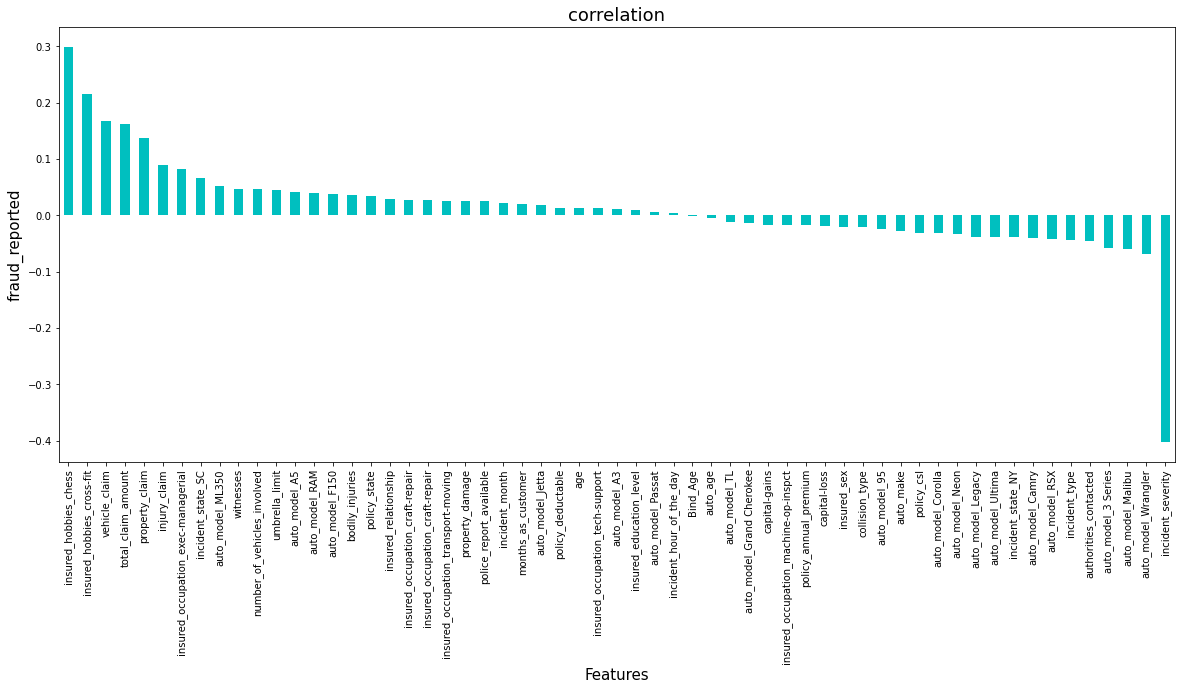

In [192]:
plt.figure(figsize = (20,8))
DF.corr()['fraud_reported'].sort_values(ascending = False).drop(['fraud_reported']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('fraud_reported',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

Incident_severity hass the highest negative correlation with fraud_reported while, insured_hobbies_chess,insured_hobbies_cross-fit,vehicle_claim,total_claim_amount,property_claim have the highest positive correlation with fraud_reported

### Feature Selection

In [193]:
from sklearn.preprocessing import StandardScaler

In [194]:
X = DF.drop(columns = ['fraud_reported'])
y = DF['fraud_reported']

In [195]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

### Checking for Multicollinearity using Variance Inflation Factor

In [196]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [197]:
vif = pd.DataFrame()

In [198]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [199]:
vif

,Features,vif
0,months_as_customer,7.070161e+00
1,age,7.075387e+00
2,policy_state,1.053762e+00
3,policy_csl,1.049897e+00
4,policy_deductable,1.056129e+00
5,policy_annual_premium,1.054239e+00
6,umbrella_limit,1.063758e+00
7,insured_sex,1.047267e+00
8,insured_education_level,1.064351e+00
9,insured_relationship,1.049208e+00


months_as_customer,	age are highly multicollinear

### Principle Component Analysis

In [200]:
from sklearn.decomposition import PCA

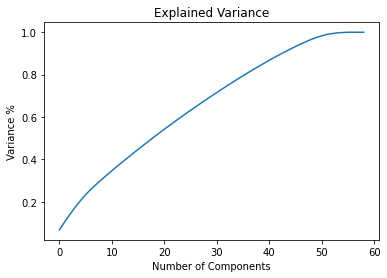

In [201]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

55 components explain around 95% variance in Data

### Selecting Kbest Features

In [202]:
from sklearn.feature_selection import SelectKBest, f_classif

In [203]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [204]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(60,'Score'))

                                 Feature       Score
14                     incident_severity  189.878968
39                 insured_hobbies_chess   96.755450
38             insured_hobbies_cross-fit   48.011131
25                         vehicle_claim   28.632540
22                    total_claim_amount   26.329157
24                        property_claim   18.992486
23                          injury_claim    7.898382
37    insured_occupation_exec-managerial    6.858080
48                   auto_model_Wrangler    4.734873
33                     incident_state_SC    4.282733
45                     auto_model_Malibu    3.509611
58                   auto_model_3 Series    3.237026
54                      auto_model_ML350    2.667017
20                             witnesses    2.208599
17           number_of_vehicles_involved    2.097007
15                 authorities_contacted    1.988298
6                         umbrella_limit    1.981465
12                         incident_type    1.

#### Selecting best features based on their scores:

In [205]:
x_best = X.drop(columns=['Bind_Age','age']).copy()

In [206]:
scaled_x_best = scaler.fit_transform(x_best)

### This is a Classification problem since Target/ Lable column ('fraud_reported') has Catergorical type of Data.


## Classification Model Building

### Balancing out classes in Label column 'Churn' using SMOTE technique.

In [207]:
from imblearn.over_sampling import SMOTE as sm

In [208]:
smt_x,smt_y = sm().fit_resample(scaled_x_best,y)

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Finding the best random state

In [210]:
from sklearn.ensemble import RandomForestClassifier
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .31, random_state = i)
    modRF =  RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.9264069264069265 on random_state: 9


In [211]:
x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .31,random_state = 9)

In [212]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score as cvs

In [214]:
RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier()
XGBC= XGBClassifier()
ADBC = AdaBoostClassifier()
LOGR= LogisticRegression(solver='liblinear')
SV =  SVC()
KNN = KNeighborsClassifier()

### Training and Testing the Models

In [219]:
models=[RFC,DTC,XGBC,ADBC,LOGR,SV,KNN]
for m in models:
    m.fit(x_train,y_train.ravel())
    pred=m.predict(x_test)
    conf_matrix=confusion_matrix(y_test,pred)
    accu=classification_report(y_test,pred)
    CVS=cvs(m,smt_x,smt_y,cv=5).mean()
    ras=roc_auc_score(y_test,pred)
    print(m,"Results:")
    print("Confusion Matrix:",conf_matrix)
    print("Accuracy:",accu)
    print("Cross Validation Score:",CVS)
    print("ROC AUC Score:",ras)
    print("\n")
    

RandomForestClassifier() Results:
Confusion Matrix: [[208  17]
 [ 13 224]]
Accuracy:               precision    recall  f1-score   support

           0       0.94      0.92      0.93       225
           1       0.93      0.95      0.94       237

    accuracy                           0.94       462
   macro avg       0.94      0.93      0.93       462
weighted avg       0.94      0.94      0.94       462

Cross Validation Score: 0.8831469052945563
ROC AUC Score: 0.9347960618846695


DecisionTreeClassifier() Results:
Confusion Matrix: [[188  37]
 [ 37 200]]
Accuracy:               precision    recall  f1-score   support

           0       0.84      0.84      0.84       225
           1       0.84      0.84      0.84       237

    accuracy                           0.84       462
   macro avg       0.84      0.84      0.84       462
weighted avg       0.84      0.84      0.84       462

Cross Validation Score: 0.8461618421349965
ROC AUC Score: 0.8397187060478201


[20:52:51] WARNING

### Based on comparing Accuracy Score results, with Cross Validation results, it is determined that XGB Classifier and Random Forest Classifiers are the best models.

### ROC AUC curves 

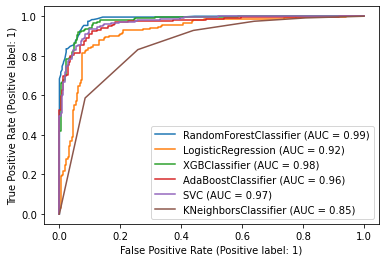

In [220]:
disp = plot_roc_curve(RFC,x_test,y_test)
mod = [LOGR,XGBC,ADBC,SV,KNN]
for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

### Based on the above graph and roc_auc_scores,Random Forest Classifier is the best model for the dataset, with AUC = 0.99 and roc_auc_score = 0.9347

### Hyper Parameter Tuning

#### Random Forest Classifier

In [221]:
from sklearn.model_selection import GridSearchCV

#### Random Forest Classifier

In [222]:
parameter = {'n_estimators':[30,50,60],'max_depth': [10,20,40,60,80],'min_samples_leaf':[5,10,15,20,30],'min_samples_split':[2,5,10,20],'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}

In [226]:
GridCV = GridSearchCV(RandomForestClassifier(),parameter,cv=2,n_jobs = -1,verbose = 1)

In [227]:
GridCV.fit(x_train,y_train)

Fitting 2 folds for each of 1800 candidates, totalling 3600 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15, 20, 30],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [30, 50, 60]},
             verbose=1)

In [228]:
GridCV.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 50}

In [229]:
Best_mod = RandomForestClassifier(n_estimators = 50,criterion = 'entropy', max_depth= 10, max_features = 'auto',min_samples_leaf = 5, min_samples_split = 5)
Best_mod.fit(x_train,y_train)
rfpred = Best_mod.predict(x_test)
acc = accuracy_score(y_test,rfpred)
print(acc*100)


91.55844155844156


#### Random Forest Classifier has an accuracy of 91.55%

In [230]:
conf_matrx = confusion_matrix(y_test,rfpred)
conf_matrx

array([[207,  18],
       [ 21, 216]], dtype=int64)

#### Saving The Model

In [231]:
import joblib
joblib.dump(Best_mod,"BestModelInsurance_Fraud.pkl")

['BestModelInsurance_Fraud.pkl']

#### Loading The Model

In [232]:
mod=joblib.load("BestModelInsurance_Fraud.pkl")

In [233]:
print(mod.predict(x_test))

[0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1
 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0
 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1
 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1
 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0
 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0
 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0
 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1
 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1
 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1]


In [234]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x_test), 'Actual Values': y_test})
Prediction_accuracy.head(50)

,Predictions,Actual Values
281,0,0
937,0,0
1196,1,1
185,0,0
509,0,0
412,0,0
552,0,0
1325,1,1
621,0,0
691,0,1
